<a href="https://colab.research.google.com/github/Adizcool/Room_Price_Prediction/blob/main/Room_Price_Prediction_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using all the Regressors with Advertising Dataset**



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Importing the dataset
dataset = pd.read_csv("gdrive/My Drive/Datasets/Room Price Prediction/Room_Price_Data_Preprocessed.csv")
print(dataset.shape)
dataset.head()

(4201, 22)


,CancellationPolicy,Accommodates,RoomType,Bathrooms,Bedrooms,CleaningFee,ReviewRating,Price,District_Brooklyn,District_Manhattan,District_Queens,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,PropertyType_0,PropertyType_1,PropertyType_2,PropertyType_3,PropertyType_4
0,2,2,0,1.0,0.0,75.000000,86.0,160.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,2,0,1.0,1.0,66.646525,100.0,130.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2,4,0,1.0,0.0,69.000000,91.0,129.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,0,2,0,1.0,1.0,60.000000,100.0,145.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,2,9,0,2.5,3.0,160.000000,94.0,399.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CancellationPolicy  4201 non-null   int64  
 1   Accommodates        4201 non-null   int64  
 2   RoomType            4201 non-null   int64  
 3   Bathrooms           4201 non-null   float64
 4   Bedrooms            4201 non-null   float64
 5   CleaningFee         4201 non-null   float64
 6   ReviewRating        4201 non-null   float64
 7   Price               4201 non-null   float64
 8   District_Brooklyn   4201 non-null   int64  
 9   District_Manhattan  4201 non-null   int64  
 10  District_Queens     4201 non-null   int64  
 11  Neighborhood_0      4201 non-null   int64  
 12  Neighborhood_1      4201 non-null   int64  
 13  Neighborhood_2      4201 non-null   int64  
 14  Neighborhood_3      4201 non-null   int64  
 15  Neighborhood_4      4201 non-null   int64  
 16  Neighb

In [5]:
X=dataset.drop(['Price'], axis=1)
y=dataset['Price']
X[:5]

,CancellationPolicy,Accommodates,RoomType,Bathrooms,Bedrooms,CleaningFee,ReviewRating,District_Brooklyn,District_Manhattan,District_Queens,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,PropertyType_0,PropertyType_1,PropertyType_2,PropertyType_3,PropertyType_4
0,2,2,0,1.0,0.0,75.000000,86.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,2,0,1.0,1.0,66.646525,100.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2,4,0,1.0,0.0,69.000000,91.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,0,2,0,1.0,1.0,60.000000,100.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,2,9,0,2.5,3.0,160.000000,94.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [6]:
y[:5]

0    160.0
1    130.0
2    129.0
3    145.0
4    399.0
Name: Price, dtype: float64

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3360, 21)
(3360,)
(841, 21)
(841,)


##**1) Linear Regressor (LR)**

In [8]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model=LR.fit(X_train, y_train)

In [9]:
# Calculate the accuracy of learning by the Algorithm
LR.score(X_train,y_train) 

0.5713014954226205

In [10]:
# Predicting the Test set results
y_pred = LR.predict(X_test)

In [11]:
# Calcualte the accuracy of prediction (y_test Vs y_pred) # This measure is part of Model Evaluation
r2_score(y_test, y_pred)

0.5505049463642514

In [12]:
# Calculate the Model Error (RMSE) # This measure is also part of Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

71.89127826709701

In [13]:
LR_Training_Acc= LR.score(X_train,y_train)
LR_Testing_Acc = r2_score(y_test,y_pred)

In [14]:
print("Training Accuracy :", LR_Training_Acc)
print("Testing Accuracy :", LR_Testing_Acc)

Training Accuracy : 0.5713014954226205
Testing Accuracy : 0.5505049463642514


In [15]:
New_prediction1 = LR.predict(X_train)
print(New_prediction1[:5])

[203.52566778 198.97249805 113.3094839  168.4206496  172.25001825]


In [16]:
LR_Training_Err= mean_squared_error(y_train,New_prediction1)
LR_Testing_Err = mean_squared_error(y_test, y_pred)

In [17]:
print("Training Error :", LR_Training_Err)
print("Testing Error :", LR_Testing_Err)

Training Error : 5292.042320787496
Testing Error : 5168.355890877175


In [18]:
# k-fold CV 
#lm = LinearRegression()
scores1 = cross_val_score(LR, X, y, scoring='r2', cv=5)
print(scores1)
LR_CV_Average=np.average(scores1)   
LR_CV_Average

[0.57392339 0.50851993 0.60207924 0.52118282 0.58972781]


0.5590866382261763

##**2) Random Forest Regressor (RFR)**

In [19]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=300, random_state=0)
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [20]:
# Calculate the accuracy of learning by the Algorithm
RFR.score(X_train,y_train) 

0.9330448761658652

In [21]:
# Predicting the Test set results
RFR_y_pred = RFR.predict(X_test)
print(y_test)
print()
print(RFR_y_pred)

3037    245.0
3485    339.0
3347     40.0
72      200.0
2284    200.0
        ...  
643      85.0
570      68.0
3509    175.0
173     250.0
1746    850.0
Name: Price, Length: 841, dtype: float64

[356.98       339.65        90.37388889 152.71511111 156.18283333
  90.42333333 147.14       108.12333333  62.65        85.21362698
 170.85       220.715      141.77888889  49.45410053 154.305
  66.29333333 120.56333333  81.33277778 193.55777778  86.80722222
 154.4         58.59863757  94.74722222 150.72666667 102.42666667
 167.19166667 178.18066667 211.13061111  91.08333333 600.87333333
  76.61166667  94.84       228.35566667  85.69370238 380.99333333
  67.16       115.73111111 111.20333333 220.97888889 247.87055556
 105.70166667  98.90722222  70.37        92.82988889 184.38666667
 200.47427778  90.61638889 229.67666667 280.03555556 132.86166667
 209.85638889 254.77333333  53.30611111 139.26777778 137.40805556
 163.69833333 251.78916667 168.1216746  106.97638889 158.26666667
 157.25666667 146

In [22]:
RFR_Training_Acc = RFR.score(X_train,y_train)
RFR_Testing_Acc = r2_score(y_test,RFR_y_pred)

In [23]:
print("Training Accuracy :", RFR_Training_Acc)
print("Testing Accuracy :", RFR_Testing_Acc)

Training Accuracy : 0.9330448761658652
Testing Accuracy : 0.5204655411351908


In [24]:
RFR_Train_Prediction = RFR.predict(X_train)
print(RFR_Train_Prediction[:5])

[205.33166667 203.72       157.15222222 156.31666667 187.01333333]


In [25]:
RFR_Training_Err = mean_squared_error(y_train,RFR_Train_Prediction)
RFR_Testing_Err = mean_squared_error(y_test, RFR_y_pred)

In [26]:
print("Training Error :", RFR_Training_Err)
print("Testing Error :", RFR_Testing_Err)

Training Error : 826.5234078040801
Testing Error : 5513.753099852634


In [27]:
# k-fold CV 
#lm = LinearRegression()
RFR_scores = cross_val_score(RFR, X, y, scoring='r2', cv=5)
print(RFR_scores)
RFR_CV_Average=np.average(RFR_scores)   
RFR_CV_Average

[0.56971743 0.516992   0.54696346 0.50862721 0.54792526]


0.5380450729398657

##**3) Decision Trees Regressor (DTR)**

In [28]:
from sklearn.tree import DecisionTreeRegressor 
#DecisionTreeRegressor class has many parameters. Input only random_state=0 or 42.
DTR = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset. 
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
DTR_y_pred = DTR.predict(X_test)
print(y_test)
print()
print(DTR_y_pred)

3037    245.0
3485    339.0
3347     40.0
72      200.0
2284    200.0
        ...  
643      85.0
570      68.0
3509    175.0
173     250.0
1746    850.0
Name: Price, Length: 841, dtype: float64

[700.         590.          80.          85.         195.
 100.         185.         100.          50.          90.
 183.         200.         150.          40.         160.
  60.          89.         139.         190.          85.
 149.          40.         110.         103.          70.
 129.         149.         225.          59.         600.
  75.         120.         175.          81.         200.
  27.          89.         115.         190.         299.
 135.         100.          69.          92.         265.
 169.         135.         175.         225.         220.
 170.         250.          49.5        169.          89.
 185.         400.         194.5        110.         250.
 165.         225.         225.         199.         150.
 199.          70.         112.         100.      

In [30]:
DTR_Training_Acc = DTR.score(X_train,y_train)
DTR_Testing_Acc = r2_score(y_test,DTR_y_pred)

In [31]:
print("Training Accuracy :", DTR_Training_Acc)
print("Testing Accuracy :", DTR_Testing_Acc)

Training Accuracy : 0.9933449709815371
Testing Accuracy : 0.07524541047549482


In [32]:
DTR_Train_Prediction = DTR.predict(X_train)
print(DTR_Train_Prediction[:5])

[200. 205. 191. 148. 185.]


In [33]:
DTR_Training_Err = mean_squared_error(y_train,DTR_Train_Prediction)
DTR_Testing_Err = mean_squared_error(y_test, DTR_y_pred)

In [34]:
print("Training Error :", DTR_Training_Err)
print("Testing Error :", DTR_Testing_Err)

Training Error : 82.15259637188208
Testing Error : 10632.955338942947


In [35]:
# k-fold CV 
#lm = LinearRegression()
DTR_scores = cross_val_score(DTR, X, y, scoring='r2', cv=5)
print(DTR_scores)
DTR_CV_Average=np.average(DTR_scores)   
DTR_CV_Average

[0.1949168  0.20185225 0.10444984 0.13148566 0.05491223]


0.1375233543747549

##**4) Support Vector Regressor**

In [36]:
from sklearn.svm import SVR
SVR = SVR()
#SVR_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
SVR.fit(X_train, y_train)

SVR()

In [37]:
SVR_y_pred = SVR.predict(X_test)
print(y_test)
print()
print(SVR_y_pred)

3037    245.0
3485    339.0
3347     40.0
72      200.0
2284    200.0
        ...  
643      85.0
570      68.0
3509    175.0
173     250.0
1746    850.0
Name: Price, Length: 841, dtype: float64

[245.72525704 189.02991443  98.43493779 107.6460576  139.99351777
  91.60626605  97.53142748 136.42921157 141.71126356 138.16110713
 131.80887324 120.47368564 133.36034114 141.8381753  137.79514721
  91.64380222 116.71733376  94.47253817 141.86582055 139.71951375
  96.22468577 146.43482247  93.71343989 109.19286869 182.99944246
 104.91747989 154.02515087 152.42603877 105.78165051 221.77294886
  95.26426192 119.29813899 187.92143011 141.3602199  246.1828543
  86.59014699 136.91508552 118.76286881 140.21788252 153.330628
 118.41453965  96.62788653 136.42194089 108.56866462 218.94512702
 140.82016885 105.63480762 241.5600381  214.16696781 121.49178367
 141.32132395 144.24027327 140.46639931 105.24680289  99.45583892
 101.23971365 146.03595799 133.1684313  137.65005604 119.1894696
 132.41960022  9

In [38]:
SVR_Training_Acc = SVR.score(X_train,y_train)
SVR_Testing_Acc = r2_score(y_test,SVR_y_pred)

In [39]:
print("Training Accuracy :", SVR_Training_Acc)
print("Testing Accuracy :", SVR_Testing_Acc)

Training Accuracy : 0.22732905167513073
Testing Accuracy : 0.17650420516993293


In [40]:
SVR_Train_Prediction = SVR.predict(X_train)
print(SVR_Train_Prediction[:5])

[188.52818704 138.00875434 148.19480913 121.48361896 145.15043695]


In [41]:
SVR_Training_Err = mean_squared_error(y_train, SVR_Train_Prediction)
SVR_Testing_Err = mean_squared_error(y_test, SVR_y_pred)

In [42]:
print("Training Error :", SVR_Training_Err)
print("Testing Error :", SVR_Testing_Err)

Training Error : 9538.188995105664
Testing Error : 9468.667803787523


In [43]:
# k-fold CV 
#lm = LinearRegression()
SVR_scores = cross_val_score(SVR, X, y, scoring='r2', cv=5)
print(SVR_scores)
SVR_CV_Average=np.average(SVR_scores)   
SVR_CV_Average

[0.21198843 0.18409324 0.22053564 0.20680454 0.23965204]


0.2126147774999983

##**5) KNN Regressor**

In [44]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNN_Regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_Regressor.fit(X_train, y_train)  #fit the model
    KNN_pred=KNN_Regressor.predict(X_test) #make prediction on test set
    KNN_error = sqrt(mean_squared_error(y_test,KNN_pred)) #calculate rmse
    rmse_val.append(KNN_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', KNN_error)

RMSE value for k=  1 is: 103.62167651145197
RMSE value for k=  2 is: 91.9693765917643
RMSE value for k=  3 is: 88.36254648969184
RMSE value for k=  4 is: 86.94897202740852
RMSE value for k=  5 is: 84.65755990734037
RMSE value for k=  6 is: 83.4696912532163
RMSE value for k=  7 is: 83.61857597247364
RMSE value for k=  8 is: 83.80336649579502
RMSE value for k=  9 is: 83.5647445318713
RMSE value for k=  10 is: 83.32971992958696
RMSE value for k=  11 is: 83.40028160166203
RMSE value for k=  12 is: 83.02988379643861
RMSE value for k=  13 is: 83.00780528587968
RMSE value for k=  14 is: 83.3046979403022
RMSE value for k=  15 is: 82.87698802048652
RMSE value for k=  16 is: 83.16598915761125
RMSE value for k=  17 is: 83.291797632563
RMSE value for k=  18 is: 83.34769724711654
RMSE value for k=  19 is: 83.40050997296981
RMSE value for k=  20 is: 83.37677939600128


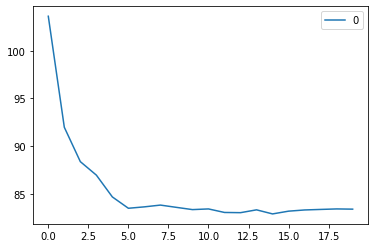

In [46]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [47]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor(n_neighbors=5)
KNNR.fit(X_train, y_train)

KNeighborsRegressor()

In [48]:
KNN1_y_pred=KNNR.predict(X_test)

In [49]:
KNN1_Training_Acc = KNNR.score(X_train,y_train)
KNN1_Testing_Acc = r2_score(y_test,KNN1_y_pred)

In [50]:
print("Training Accuracy :", KNN1_Training_Acc)
print("Testing Accuracy :", KNN1_Testing_Acc)

Training Accuracy : 0.615523061639218
Testing Accuracy : 0.3766901372618784


In [51]:
KNN1_Train_Prediction = KNNR.predict(X_train)
print(KNN1_Train_Prediction[:5])

[192.  198.2 108.2 198.4 187.8]


In [52]:
KNN1_Training_Err = mean_squared_error(y_train, KNN1_Train_Prediction)
KNN1_Testing_Err = mean_squared_error(y_test, KNN1_y_pred)

In [53]:
print("Training Error :", KNN1_Training_Err)
print("Testing Error :", KNN1_Testing_Err)

Training Error : 4746.151916666667
Testing Error : 7166.902449464924


In [54]:
# k-fold CV 
#lm = LinearRegression()
KNNR_scores = cross_val_score(KNNR, X, y, scoring='r2', cv=5)
print(KNNR_scores)
KNNR_CV_Average=np.average(KNNR_scores)   
DTR_CV_Average

[0.42289928 0.38460112 0.44473276 0.35986405 0.42211528]


0.1375233543747549

##**6) Ridge Regressor**

###**a) Module Tuning for Ridge Regression**

In [55]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error1 = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    #new_validation_error1 = np.sqrt(mean_squared_error(y_validation, ridge.predict(X_validation)))
    new_test_error1 = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error1,3),
                 #round(new_validation_error1,3),
                 round(new_test_error1,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 72.746 | test error: 71.891
alpha:    0.01 | train error: 72.746 | test error: 71.891
alpha:     0.1 | train error: 72.747 | test error: 71.893
alpha:       1 | train error: 72.753 | test error: 71.904
alpha:      10 | train error: 72.803 | test error: 71.964


###**b) Execution of Ridge Regression**

In [56]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
Ridge_Train_Acc = r2_score(y_train, pred_train_ridge)
Ridge_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_ridge))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print("Train Accuracy : ", r2_score(y_train, pred_train_ridge))
pred_test_ridge= ridge.predict(X_test)
Ridge_Test_Acc = r2_score(y_test, pred_test_ridge)
Ridge_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_ridge))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("Test Accuracy : ", r2_score(y_test, pred_test_ridge))

Train Error :  72.80295121116889
Train Accuracy :  0.5706350103269576
Test Error :  71.96367470300815
Test Accuracy :  0.5495991834990379


In [57]:
# k-fold CV 
#lm = LinearRegression()
Ridge_scores = cross_val_score(ridge, X, y, scoring='r2', cv=5)
print(Ridge_scores)
Ridge_CV_Average=np.average(Ridge_scores)   
Ridge_CV_Average

[0.57788548 0.508231   0.60235453 0.51940001 0.58849828]


0.5592738609848944

##**7) Lasso Regressor**

###**a) Module Tuning for Lasso Regression**

In [58]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    #ridge.fit(X_train, y_train)
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=99)
    lasso.fit(X_train, y_train)
    # calculate errors
    new_train_error2 = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    #new_validation_error2 = np.sqrt(mean_squared_error(y_validation, lasso.predict(X_validation)))
    new_test_error2 = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'. 
          format(alpha,
                 round(new_train_error2,3),
                 #round(new_validation_error2,3),
                 round(new_test_error2,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 72.746 | test error: 71.885
alpha:    0.01 | train error: 72.75 | test error: 71.898
alpha:     0.1 | train error: 72.839 | test error: 72.061
alpha:       1 | train error: 73.835 | test error: 72.85
alpha:      10 | train error: 82.458 | test error: 82.68


###**b) Execution of Lasso Regression**

In [59]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
Lasso_Train_Acc = r2_score(y_train, pred_train_lasso)
Lasso_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_lasso))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Train Accuracy : ", r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
Lasso_Test_Acc = r2_score(y_test, pred_test_lasso)
Lasso_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_lasso))
print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Test Accuracy : ", r2_score(y_test, pred_test_lasso))

Train Error :  72.83930045898697
Train Accuracy :  0.5702061543443422
Test Error :  72.06137981190773
Test Accuracy :  0.5483753345279887


In [60]:
# k-fold CV 
#lm = LinearRegression()
Lasso_scores = cross_val_score(model_lasso, X, y, scoring='r2', cv=5)
print(Lasso_scores)
Lasso_CV_Average=np.average(Lasso_scores)   
Lasso_CV_Average

[0.57792815 0.50752312 0.60202625 0.51744968 0.58841998]


0.5586694377979985

##**8) ElasticNet Regression**

###**a) Module Tuning for ElasticNet Regression**

In [61]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    #ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    enet  = ElasticNet(alpha=alpha, fit_intercept=True, random_state=99)
    enet.fit(X_train, y_train)
    # calculate errors
    new_train_error3 = np.sqrt(mean_squared_error(y_train, enet.predict(X_train)))
    #new_validation_error3 = np.sqrt(mean_squared_error(y_validation, enet.predict(X_validation)))
    new_test_error3 = np.sqrt(mean_squared_error(y_test, enet.predict(X_test)))
    # print errors as report
    #print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
    print('alpha: {:7} | train error: {:5} | test error: {}'.     
          format(alpha,
                 round(new_train_error3,3),
                 #round(new_validation_error3,3),
                 round(new_test_error3,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 72.758 | test error: 71.91
alpha:    0.01 | train error: 72.846 | test error: 72.004
alpha:     0.1 | train error: 73.849 | test error: 72.836
alpha:       1 | train error: 79.008 | test error: 78.502
alpha:      10 | train error: 87.498 | test error: 88.241


###**b) Execution of ElasticNet Regression**

In [62]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
ElasticNet_Train_Acc = r2_score(y_train, pred_train_enet)
ElasticNet_Train_Err = np.sqrt(mean_squared_error(y_train,pred_train_enet))
print("Train Error : ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Train Accuracy : ", r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
ElasticNet_Test_Acc = r2_score(y_test, pred_test_enet)
ElasticNet_Test_Err = np.sqrt(mean_squared_error(y_test,pred_test_enet))

print("Test Error : ", np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Test Accuracy : ", r2_score(y_test, pred_test_enet))

Train Error :  73.84941332449763
Train Accuracy :  0.5582030035221981
Test Error :  72.83560506503301
Test Accuracy :  0.538618719102927


In [63]:
# k-fold CV 
#lm = LinearRegression()
ElasticNet_scores = cross_val_score(model_enet, X, y, scoring='r2', cv=5)
print(ElasticNet_scores)
ElasticNet_CV_Average=np.average(ElasticNet_scores)   
ElasticNet_CV_Average

[0.56599428 0.50205348 0.59676555 0.51010951 0.56878144]


0.5487408519099144

In [64]:
df1 = pd.DataFrame({
    'ML Algorithm': ['Linear_Regression','Random_Forest_Regressor','Decision_Trees_Regressor','Support_Vector_Regressor', 'KNN_Regressor', 'Ridge_Regressor','Lasso_Regressor', 'ElasticNet_Regressor'],
    'Train_acc': [LR_Training_Acc, RFR_Training_Acc, DTR_Training_Acc, SVR_Training_Acc, KNN1_Training_Acc, Ridge_Train_Acc, Lasso_Train_Acc, ElasticNet_Train_Acc], 
    'Test_acc': [LR_Testing_Acc, RFR_Testing_Acc, DTR_Testing_Acc, SVR_Testing_Acc, KNN1_Testing_Acc, Ridge_Test_Acc, Lasso_Test_Acc, ElasticNet_Test_Acc ],
    'Cross_Val_Score_Average': [LR_CV_Average, RFR_CV_Average, DTR_CV_Average, SVR_CV_Average, KNNR_CV_Average, Ridge_CV_Average, Lasso_CV_Average, ElasticNet_CV_Average],
    'Train_Err': [LR_Training_Err, RFR_Training_Err, DTR_Training_Err, SVR_Training_Err, KNN1_Training_Err, Ridge_Train_Err, Lasso_Train_Err, ElasticNet_Train_Err], 
    'Test_Err': [LR_Testing_Err, RFR_Testing_Err, DTR_Testing_Err, SVR_Testing_Err, KNN1_Testing_Err, Ridge_Test_Err, Lasso_Test_Err, ElasticNet_Test_Err],
    #'GridSearchCV_based_acc': [lr_grid_acc_avg, bayes_grid_acc_avg, rfc_grid_acc_avg, dtc_grid_acc_avg, kNN_grid_acc_avg, svc_grid_acc_avg],
    'Suitability': ['Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Not Suitable', 'Finalized', 'Not Suitable', 'Not Suitable']})

df1

,ML Algorithm,Train_acc,Test_acc,Cross_Val_Score_Average,Train_Err,Test_Err,Suitability
0,Linear_Regression,0.571301,0.550505,0.559087,5292.042321,5168.355891,Not Suitable
1,Random_Forest_Regressor,0.933045,0.520466,0.538045,826.523408,5513.753100,Not Suitable
2,Decision_Trees_Regressor,0.993345,0.075245,0.137523,82.152596,10632.955339,Not Suitable
3,Support_Vector_Regressor,0.227329,0.176504,0.212615,9538.188995,9468.667804,Not Suitable
4,KNN_Regressor,0.615523,0.376690,0.406842,4746.151917,7166.902449,Not Suitable
5,Ridge_Regressor,0.570635,0.549599,0.559274,72.802951,71.963675,Finalized
6,Lasso_Regressor,0.570206,0.548375,0.558669,72.839300,72.061380,Not Suitable
7,ElasticNet_Regressor,0.558203,0.538619,0.548741,73.849413,72.835605,Not Suitable
